# INTRODUCTION
In this Notebook we will be working on famous classic Machine Learning project using the famous Iris dataset!
This dataset contains measurements of three different Iris flower species: Setosa, Versicolor, and Virginica. Each flower sample is described by four features:

Sepal Length

Sepal Width

Petal Length

Petal Width

Our goal in this project is to build a robust Machine Learning model that can accurately classify a flower species based on its measurements.



## Import necessary libraries

In [ ]:
#import necessary liraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


## Load dataset

In [ ]:
#load dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names=iris.target_names

In [ ]:
#convert to dataframe for better readability
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = [target_names[i] for i in y]
print("Dataset Preview:")
print(df.head() ,"\n")

Dataset Preview:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa   



## Exploratory Data Analysis (EDA)

Before training models, let's perform some basic EDA to understand the dataset better.

In [ ]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())
print("\n")

# Display concise summary of the DataFrame
print("DataFrame Info:")
df.info()
print("\n")

# Display descriptive statistics of the DataFrame
print("DataFrame Description:")
display(df.describe())

Missing values in each column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


DataFrame Description:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Visualizing the Data

Let's visualize the data to understand the relationships between the features and the different species.

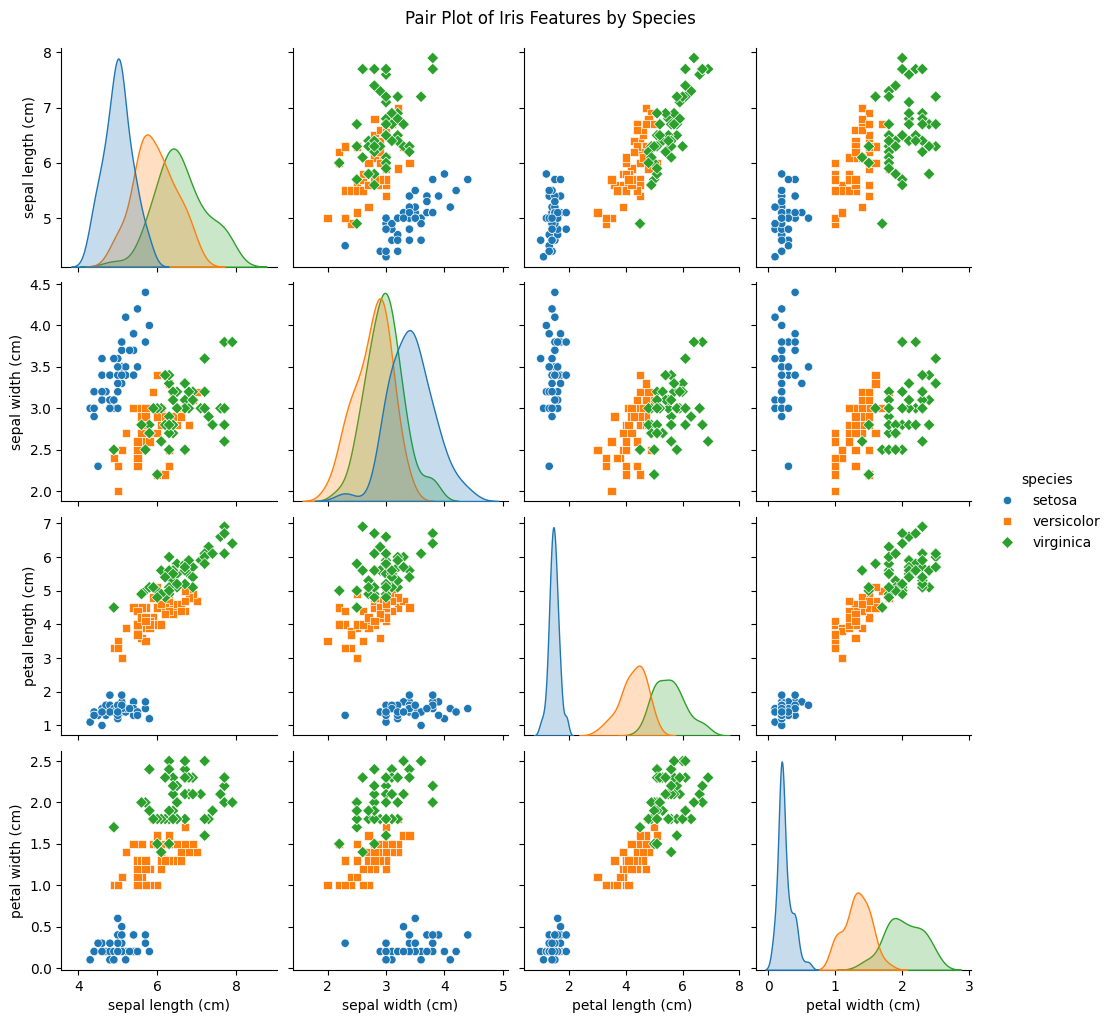

In [ ]:
# Pair plot to visualize relationships between features and species
sns.pairplot(df, hue="species", markers=["o", "s", "D"])
plt.suptitle("Pair Plot of Iris Features by Species", y=1.02)
plt.show()

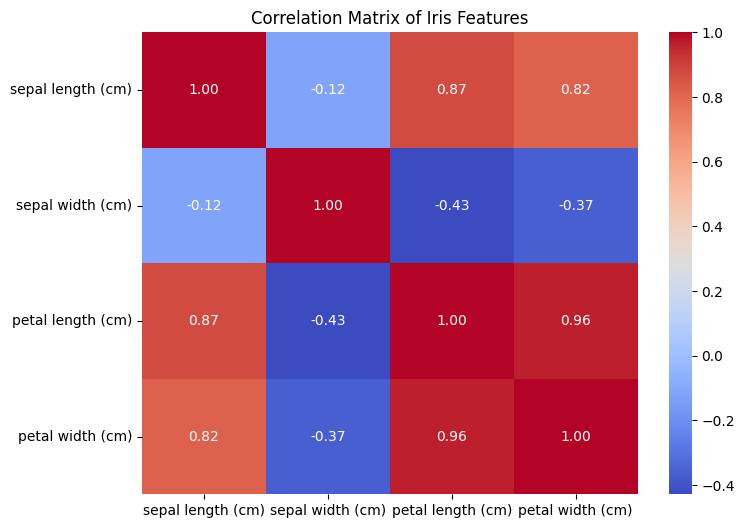

In [ ]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop('species', axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Iris Features")
plt.show()

## Train-Test Splitting

In [ ]:
#split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("shape of X_train:", X_train.shape)
print("shape of X_test:", X_test.shape)
print("shape of y_train:", y_train.shape)
print("shape of y_test:", y_test.shape)

shape of X_train: (120, 4)
shape of X_test: (30, 4)
shape of y_train: (120,)
shape of y_test: (30,)


## Feature Scaling

In [ ]:
#feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Model Defining

In [ ]:
#Define Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', C=1, gamma='auto', random_state=42),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
}

## Model Training and Evaluation

In [ ]:
#train and evaluate each model
accuracy_scores = {}
trained_models = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy
    trained_models[name] = model
    print(f"{name} Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=target_names))
    print("="*60)

Logistic Regression Accuracy: 1.0000
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Decision Tree Accuracy: 1.0000
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Random For

## Comparing models

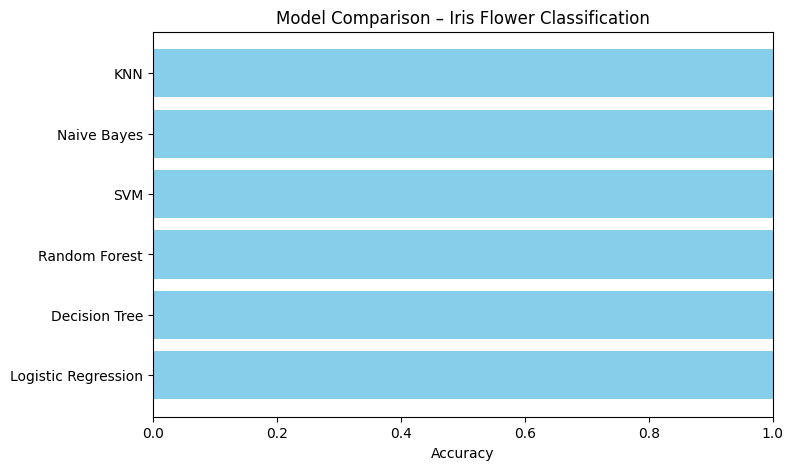

In [ ]:
#Compare model accuracies
plt.figure(figsize=(8,5))
plt.barh(list(accuracy_scores.keys()), list(accuracy_scores.values()), color='skyblue')
plt.xlabel("Accuracy")
plt.title("Model Comparison – Iris Flower Classification")
plt.xlim(0, 1)
plt.show()

## Demo Prediction

In [ ]:
# Predict Flower Species from User Input
print("\n🌼 Let's predict the flower species using your own measurements!")

# Ask user for inputs
try:
    sepal_length_str = input("Enter Sepal Length (cm): ")
    sepal_width_str = input("Enter Sepal Width (cm): ")
    petal_length_str = input("Enter Petal Length (cm): ")
    petal_width_str = input("Enter Petal Width (cm): ")

    # Validate inputs
    sepal_length = float(sepal_length_str)
    sepal_width = float(sepal_width_str)
    petal_length = float(petal_length_str)
    petal_width = float(petal_width_str)

    user_data = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    user_data_scaled = scaler.transform(user_data)

    # Select best model automatically (highest accuracy)
    best_model_name = max(accuracy_scores, key=accuracy_scores.get)
    best_model = trained_models[best_model_name]

    prediction = best_model.predict(user_data_scaled)
    predicted_species = target_names[prediction[0]]

    print(f"\n✅ The best model is: {best_model_name}")
    print(f"🌸 Predicted Flower Species: **{predicted_species.capitalize()}**")

except ValueError:
    print("\n⚠️ Invalid input. Please enter valid numeric values.")
except Exception as e:
    print(f"\n⚠️ An unexpected error occurred: {e}")


🌼 Let's predict the flower species using your own measurements!
Enter Sepal Length (cm): 5
Enter Sepal Width (cm): 5
Enter Petal Length (cm): 5
Enter Petal Width (cm): 5

✅ The best model is: Logistic Regression
🌸 Predicted Flower Species: **Virginica**
